<a href="https://colab.research.google.com/github/heysourin/Machine-Learning-Projects/blob/main/Decision%20Tree/decision_tree_postpruning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()

In [5]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
X = df.iloc[:,:-1]
y = df['target']

In [ ]:
X.shape, y.shape

((150, 4), (150,))

In [ ]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
treemodel = DecisionTreeClassifier() # Taking default hyperparams --> postpruning

In [ ]:
treemodel.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.5416666666666666, 0.9285714285714286, 'x[3] <= 0.8\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.4583333333333333, 0.7857142857142857, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.625, 0.7857142857142857, 'x[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4166666666666667, 0.6428571428571429, 'x[2] <= 5.35\ngini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.3333333333333333, 0.5, 'x[0] <= 4.95\ngini = 0.105\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(0.16666666666666666, 0.35714285714285715, 'x[2] <= 3.9\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.08333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.25, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.5, 0.35714285714285715, 'x[2] <= 4.95\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.4166666666666667, 0.21428571428571427, 'gini = 0.0\nsamples = 31\nvalue = [0, 31, 0]'),
 Text(0.5833

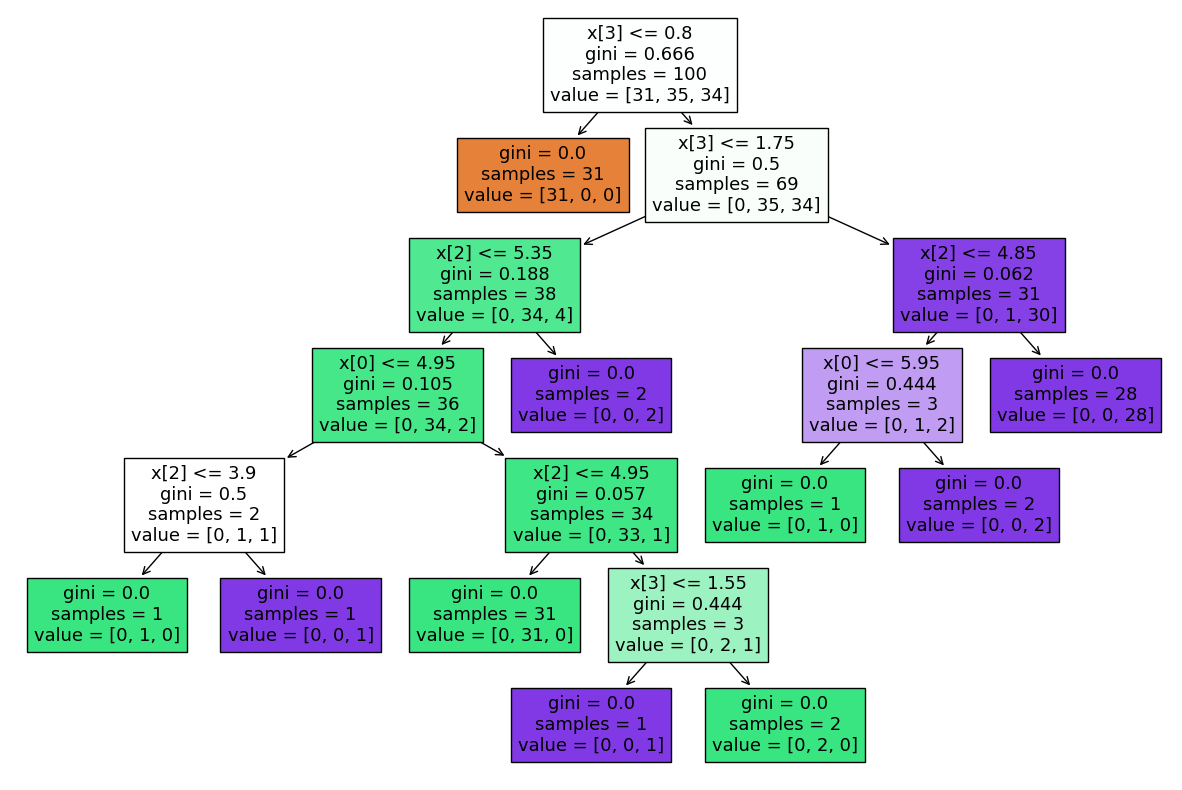

In [ ]:
# constructing the tree
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel, filled=True)

- Value = [31, 35, 34] is setosa, versicolor and verginica respectively in the training dataset.
- But notice what we are training after 3rd branch(starting from 1) is overfitting. We are going to use postpruning in this case.

In [ ]:
# Prediction
y_pred = treemodel.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

1.0

In [ ]:
df['target'].unique() # 0 = setosa, 1 = versicolor, 2 = virginica.

array([0, 1, 2])

In [ ]:
df['petal width (cm)'].unique()

array([0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, 1.6, 1. , 1.1, 1.8,
       1.2, 1.7, 2.5, 1.9, 2.1, 2.2, 2. , 2.4, 2.3])

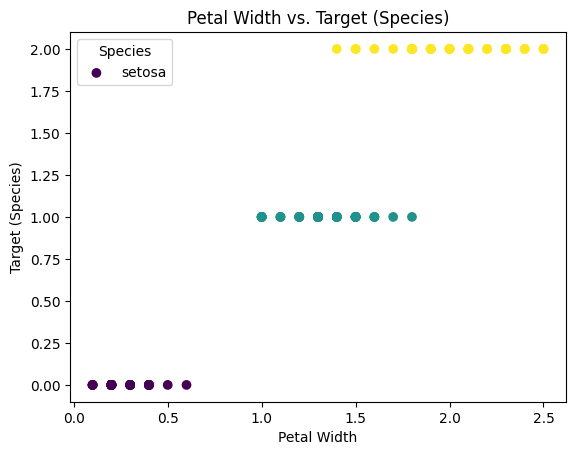

In [ ]:
# As you see here petal width < 0.8 means its setosa, pure split, leaf node.
plt.scatter(X['petal width (cm)'], y, c=y, cmap='viridis')
plt.xlabel('Petal Width')
plt.ylabel('Target (Species)')
plt.title('Petal Width vs. Target (Species)')
plt.legend(iris.target_names, title='Species')

# Show the plot
plt.show()

In [ ]:
# To fix overfitting:
treemodel = DecisionTreeClassifier(max_depth = 2)

In [ ]:
treemodel.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.45\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.062\nsamples = 31\nvalue = [0, 1, 30]')]

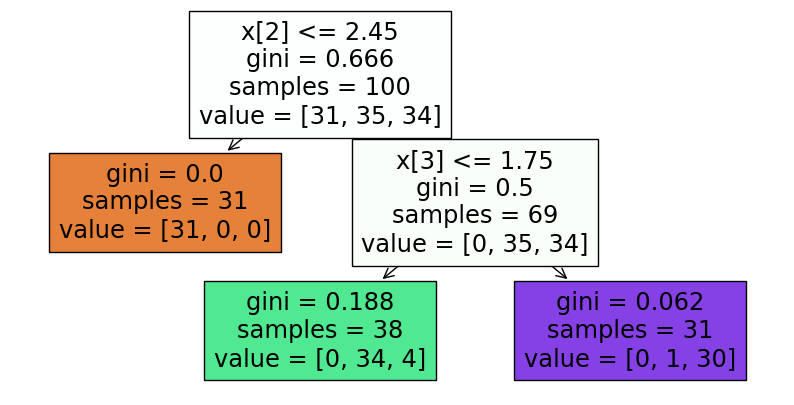

In [ ]:
# constructing the tree
from sklearn import tree
plt.figure(figsize=(10,5))
tree.plot_tree(treemodel, filled=True)

In [ ]:
# Prediction
y_pred = treemodel.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_pred, y_test)

0.98

In [ ]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

